## Assignment 3

### Qian Zhang

In [1]:
# import some packages 

import numpy as np
import scipy.optimize as opt
import scipy.interpolate as intpl
import matplotlib.pyplot as plt

### Problem 1

### 1.(a)

In [2]:
# Set up the parameters

beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)
V_t = np.log(W_vec)

# set up the epsilon

eps_vec = np.array([-1.4, -0.55, 0, 0.55, 1.4])
eps_pi = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
eps_size=len(eps_vec)

def util_CRRA(W, W_pr, gamma):
    # Define CRRA utility function
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    
    return util

# set the minimization func

def iid_neg_V(W_pr, *args):
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    Vtp1 = np.exp(eps) * util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    neg_Vtp1 = -Vtp1
    
    return neg_Vtp1

In [3]:
# set and run the iterations

V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):

    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    # get the expectation
    EV = V_init @ eps_pi.reshape((eps_size,1))
    #print(EV)
    
    EV_init_interp = intpl.interp1d(W_vec, EV.flatten(), kind='cubic',
                                   fill_value='extrapolate')

    for eps_ind in range(eps_size):
        for W_ind in range(W_size):
            e = eps_vec[eps_ind]
            W_init = W_vec[W_ind]
            V_args = (W_init, e, util_CRRA, EV_init_interp, gamma, beta)
            results_all = opt.minimize_scalar(iid_neg_V, bounds=(1e-10, W_init - 1e-10),
                                              args=V_args, method='bounded')
            V_new[W_ind,eps_ind] = -results_all.fun
            psi_mat[W_ind,eps_ind] = results_all.x
    
    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)
    
V_1 = V_new.copy()
psi_1 = psi_mat.copy()

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 3288.9775602179398
VF_iter= 3 , VF_dist= 4368.033199294504
VF_iter= 4 , VF_dist= 5171.123172733101
VF_iter= 5 , VF_dist= 5690.816865389136
VF_iter= 6 , VF_dist= 5962.334129328155
VF_iter= 7 , VF_dist= 6029.410863441401
VF_iter= 8 , VF_dist= 5938.006359170556
VF_iter= 9 , VF_dist= 5728.733568262043
VF_iter= 10 , VF_dist= 5436.089591828773
VF_iter= 11 , VF_dist= 5088.450567375278
VF_iter= 12 , VF_dist= 4708.595711207952
VF_iter= 13 , VF_dist= 4314.425870978352
VF_iter= 14 , VF_dist= 3919.6529865086823
VF_iter= 15 , VF_dist= 3534.453890340005
VF_iter= 16 , VF_dist= 3166.0717799094914
VF_iter= 17 , VF_dist= 2819.3724059115366
VF_iter= 18 , VF_dist= 2497.331372214219
VF_iter= 19 , VF_dist= 2201.4557625475145
VF_iter= 20 , VF_dist= 1932.1399178953566
VF_iter= 21 , VF_dist= 1688.9596638065682
VF_iter= 22 , VF_dist= 1470.9108719157662
VF_iter= 23 , VF_dist= 1276.5993702275612
VF_iter= 24 , VF_dist= 1104.3893159739218
VF_iter= 25 , V

### 1.(b)

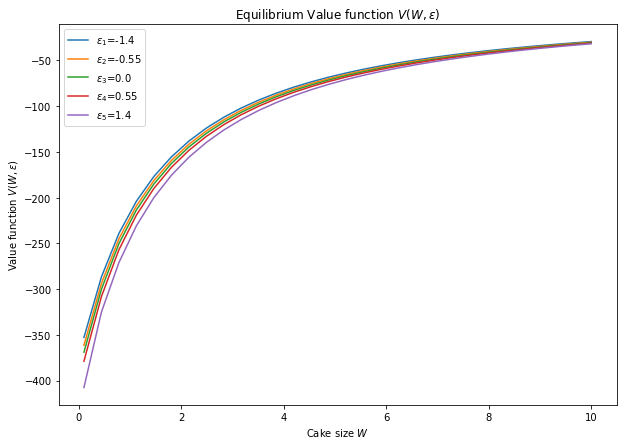

In [4]:
# Plot the equilibrium value function

plt.figure(figsize=(10,7))
for i in range(5):
    plt.plot(W_vec, V_1[:, i], label='$\epsilon_{}$={}'.format(i+1, eps_vec[i]))

plt.title('Equilibrium Value function $V(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W,\epsilon)$')
plt.legend()

### 1.(c)

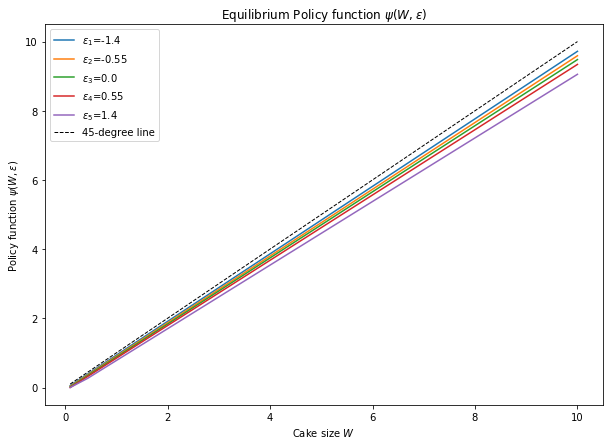

In [5]:
# plot the equilibrium policy function

plt.figure(figsize=(10,7))
for i in range(5):
    plt.plot(W_vec, psi_1[:, i], label='$\epsilon_{}$={}'.format(i+1, eps_vec[i]))

plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')

plt.title('Equilibrium Policy function ' +
          '$\psi(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $\psi(W,\epsilon)$')
plt.legend()

### Problem 2

### 2.(a)

In [6]:
# we copy the same settings as in Problem 1, except for the pi_matrix

# Set up the parameters

beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)
V_t = np.log(W_vec)

# set up the epsilon

eps_vec = np.array([-1.40, -0.55, 0, 0.55, 1.40])

pi_mat = np.array([[0.40, 0.28, 0.18, 0.10, 0.04],
                   [0.20, 0.40, 0.20, 0.13, 0.07],
                   [0.10, 0.20, 0.40, 0.20, 0.10],
                   [0.07, 0.13, 0.20, 0.40, 0.20],
                   [0.04, 0.10, 0.18, 0.28, 0.40]])

eps_size=len(eps_vec)

def util_CRRA(W, W_pr, gamma):
    # Define CRRA utility function
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    
    return util

# set the minimization func

def iid_neg_V(W_pr, *args):
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    Vtp1 = np.exp(eps) * util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    neg_Vtp1 = -Vtp1
    
    return neg_Vtp1

In [7]:
# set and run the iterations

V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):

    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    for eps_ind in range(eps_size):
        
        pi_eps = pi_mat[eps_ind,:]
        
        # get the expectation
        EV = V_init @ pi_eps.reshape((eps_size,1))
        #print(EV)

        EV_init_interp = intpl.interp1d(W_vec, EV.flatten(), kind='cubic',
                                       fill_value='extrapolate')

    
        for W_ind in range(W_size):
            
            e = eps_vec[eps_ind]
            W_init = W_vec[W_ind]
            V_args = (W_init, e, util_CRRA, EV_init_interp, gamma, beta)
            results_all = opt.minimize_scalar(iid_neg_V, bounds=(1e-10, W_init - 1e-10),
                                              args=V_args, method='bounded')
            V_new[W_ind,eps_ind] = -results_all.fun
            psi_mat[W_ind,eps_ind] = results_all.x
    
    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

V_2 = V_new.copy()
psi_2 = psi_mat.copy()

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 4874.985394413625
VF_iter= 3 , VF_dist= 5656.12392067181
VF_iter= 4 , VF_dist= 6339.326577448594
VF_iter= 5 , VF_dist= 6784.60512520715
VF_iter= 6 , VF_dist= 6985.799159895715
VF_iter= 7 , VF_dist= 6981.428377619099
VF_iter= 8 , VF_dist= 6816.840486149343
VF_iter= 9 , VF_dist= 6534.059682039727
VF_iter= 10 , VF_dist= 6169.1406209651495
VF_iter= 11 , VF_dist= 5751.815350888644
VF_iter= 12 , VF_dist= 5305.8877157047045
VF_iter= 13 , VF_dist= 4849.904814536473
VF_iter= 14 , VF_dist= 4397.907932627158
VF_iter= 15 , VF_dist= 3960.1652494132745
VF_iter= 16 , VF_dist= 3543.8552910466856
VF_iter= 17 , VF_dist= 3153.675483893924
VF_iter= 18 , VF_dist= 2792.3708357696564
VF_iter= 19 , VF_dist= 2461.1834460824566
VF_iter= 20 , VF_dist= 2160.226185380022
VF_iter= 21 , VF_dist= 1888.7889925601917
VF_iter= 22 , VF_dist= 1645.5852440446392
VF_iter= 23 , VF_dist= 1428.9469626205291
VF_iter= 24 , VF_dist= 1236.97650716786
VF_iter= 25 , VF_di

### 2.(b)

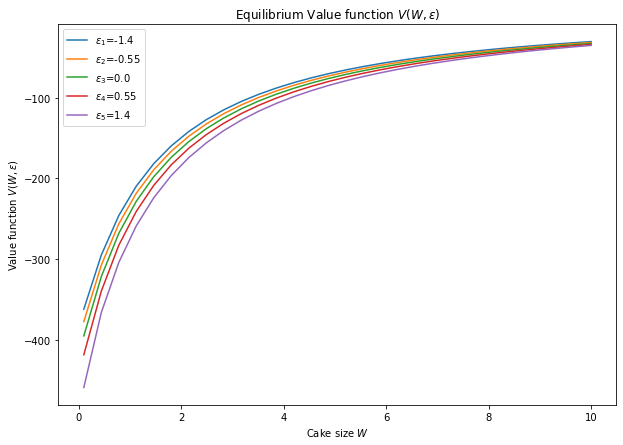

In [8]:
# Plot the equilibrium value function

plt.figure(figsize=(10,7))
for i in range(5):
    plt.plot(W_vec, V_2[:, i], label='$\epsilon_{}$={}'.format(i+1, eps_vec[i]))

plt.title('Equilibrium Value function $V(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W,\epsilon)$')
plt.legend()

### 2.(c)

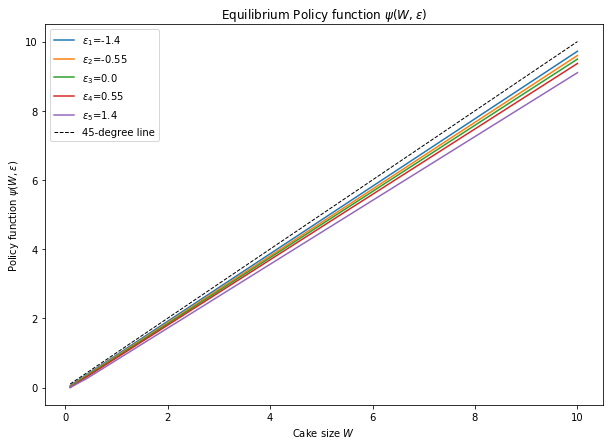

In [9]:
# plot the equilibrium policy function

plt.figure(figsize=(10,7))
for i in range(5):
    plt.plot(W_vec, psi_2[:, i], label='$\epsilon_{}$={}'.format(i+1, eps_vec[i]))

plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')

plt.title('Equilibrium Policy function ' +
          '$\psi(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $\psi(W,\epsilon)$')
plt.legend()